In [1]:
# Algoritmos: KNN, Decision Tree, Random Forest e Logistic Regression

# Métricas de performance: Accuracy, Precision, Recall e F1-Score

# Parâmetros
    # Random Forest Classifier: n_estimators, max_depth

    # K-Neighbors Classifier: n_neighbors

    # Logistic Regression: C, solver, max_iter

    # Decision Tree Classifier max_depth

# 0.0 Imports

In [3]:
import pandas as pd
import numpy as np

from matplotlib        import pyplot                 as plt

from sklearn.neighbors import KNeighborsClassifier   as knn
from sklearn.tree      import DecisionTreeClassifier as tree
from sklearn           import metrics                as mt
from sklearn           import ensemble               as en
from sklearn           import linear_model           as lm

# 1.0 Load datasets

In [5]:
df =      pd.read_csv('../datasets/dados_classificacao/X_training.csv')
y_train = pd.read_csv('../datasets/dados_classificacao/y_training.csv')
df_val =  pd.read_csv('../datasets/dados_classificacao/X_validation.csv')
y_val =   pd.read_csv('../datasets/dados_classificacao/y_validation.csv')
df_test = pd.read_csv('../datasets/dados_classificacao/X_test.csv')
y_test =  pd.read_csv('../datasets/dados_classificacao/y_test.csv')

In [6]:
colunas = [ 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']
x_train = df.loc[:,colunas]
x_val = df_val.loc[:,colunas]
x_test = df_test.loc[:,colunas]

In [7]:
df_dados_finais = pd.DataFrame({'Algoritmo': [], 
                                'Accuracy': [], 
                                'Recall': [],
                                'Precision': []})
df_dados_finais

,Algoritmo,Accuracy,Recall,Precision


# def cria tabela

In [9]:

nome_algoritmo = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
resultado_acuracia = [0]*4
resultado_precision = [0]*4
resultado_recall = [0]*4
resultado_f1=[0]*4


In [10]:
def tabela_performance(df, n, y, y_pred):
    #performance
    acuracia = mt.accuracy_score(y, y_pred)
    precision = mt.precision_score(y, y_pred)
    recall = mt.recall_score(y, y_pred, average='binary', pos_label=1)
    f1 = mt.f1_score(y, y_pred, average='binary', pos_label=1)


    #atualizando lista
    resultado_acuracia[n] = np.round(acuracia,4)
    resultado_precision[n] = np.round(precision, 4)
    resultado_recall[n] = np.round(recall, 4) 
    resultado_f1[n]= np.round(f1, 4)
    df = {"Algoritmo": nome_algoritmo,
         "Acuracia": resultado_acuracia,
         "Precision": resultado_precision,
         "F1_score": resultado_f1}
    df = pd.DataFrame(df)
    return df

# Resultado com dados de treino

### KNN com dados de treino

In [13]:
# Definition
modelo_knn = knn()

# fit 
modelo_knn.fit(x_train, y_train['0'])

# predict 
y_pred = modelo_knn.predict(x_train)

# performance
df_treino = {}
df_treino = tabela_performance(df_treino, 0, y_train, y_pred)  


### Decision Treecom dados de treino

In [15]:
# definition
modelo_tree = tree()

# fit 
modelo_tree.fit(x_train, y_train['0'])

# predict
y_pred = modelo_tree.predict(x_train)

# performance 
df_treino = tabela_performance(df_treino, 1, y_train, y_pred) 

### Random Forest com dados de treino

In [17]:
# definition
model = en.RandomForestClassifier()

# fit
model.fit(x_train, y_train['0'])

# performance 
y_pred = model.predict(x_train)

# performance
df_treino = tabela_performance(df_treino, 2, y_train, y_pred) 

### Logistic Regression com dados de treino

In [19]:
# definition
model = lm.LogisticRegression()

# fit
model.fit(x_train, y_train['0'])

# performance 
y_pred = model.predict(x_train)

# performance
df_treino = tabela_performance(df_treino, 3, y_train, y_pred) 

# Resultado com dados de validação

### KNN com dados de validação

In [22]:
# Definition
k = 5
modelo_knn = knn(n_neighbors = k)

# fit 
modelo_knn.fit(x_train, y_train['0'])

# predict 
y_pred = modelo_knn.predict(x_val)
# criação dataframe
df_val = {}
df_val = tabela_performance(df_val, 0, y_val, y_pred)

### Decision Tree com dados de validação

In [24]:
# definition
modelo_tree = tree(max_depth = 14)

# fit 
modelo_tree.fit(x_train, y_train['0'])

# predict
y_pred = modelo_tree.predict(x_val)

# performance 
df_val = tabela_performance(df_val, 1, y_val, y_pred) 

### Random Forest com dados de validação

In [26]:
# definition
model = en.RandomForestClassifier(n_estimators=50, max_depth=19)

# fit
model.fit(x_train, y_train['0'])

# performance 
y_pred = model.predict(x_val)

# performance
df_val = tabela_performance(df_val, 2, y_val, y_pred) 

### Logistic Regression com dados de validaçõa

In [28]:
# definition
model = lm.LogisticRegression(C= 1.0,max_iter = 50, solver = 'lbfgs')

# fit
model.fit(x_train, y_train['0'])

# performance 
y_pred = model.predict(x_val)

# performance
df_val = tabela_performance(df_val, 3, y_val, y_pred) 

# Resultados com dados de teste e treinamento com dados de train e val

### KNN com dados de teste

In [31]:
x_final = pd.concat([x_train, x_val], ignore_index = True)
y_final = pd.concat([y_train, y_val], ignore_index = True)

In [32]:
# Definition
k = 5
modelo_knn = knn(n_neighbors = k)

# fit 
modelo_knn.fit(x_final, y_final['0'])

# predict 
y_pred = modelo_knn.predict(x_test)
# criação dataframe
df_test = {}
df_test = tabela_performance(df_test, 0, y_test, y_pred)

### Decision Tree com dados de teste

In [34]:
# definition
modelo_tree = tree(max_depth = 14)

# fit 
modelo_tree.fit(x_final, y_final['0'])

# predict
y_pred = modelo_tree.predict(x_test)

# performance 
df_test = tabela_performance(df_test, 1, y_test, y_pred) 

### Random Forest com dados de teste

In [36]:
# definition
model = en.RandomForestClassifier(n_estimators=50, max_depth=19)

# fit
model.fit(x_final, y_final['0'])

# performance 
y_pred = model.predict(x_test)

# performance
df_test = tabela_performance(df_test, 2, y_test, y_pred) 

### Logistic Regression com dados de teste

In [38]:
# definition
model = lm.LogisticRegression(C= 1.0,max_iter = 50, solver = 'lbfgs')

# fit
model.fit(x_final, y_final['0'])

# performance 
y_pred = model.predict(x_test)

# performance
df_test = tabela_performance(df_test, 3, y_test, y_pred) 

# Resultados

In [40]:
df_treino

,Algoritmo,Acuracia,Precision,F1_score
0,KNN,0.9476,0.9701,0.9375
1,Decision Tree,1.0000,1.0000,1.0000
2,Random Forest,1.0000,1.0000,1.0000
3,Logistic Regression,0.8753,0.8707,0.8532


In [41]:
df_val

,Algoritmo,Acuracia,Precision,F1_score
0,KNN,0.9252,0.9487,0.9102
1,Decision Tree,0.9514,0.9550,0.9432
2,Random Forest,0.9623,0.9705,0.9559
3,Logistic Regression,0.8742,0.8692,0.8519


In [42]:
df_test

,Algoritmo,Acuracia,Precision,F1_score
0,KNN,0.9297,0.9537,0.9168
1,Decision Tree,0.9555,0.9598,0.9488
2,Random Forest,0.9615,0.9686,0.9555
3,Logistic Regression,0.8711,0.8685,0.8501


In [43]:
# df test, algoritmo treinado apenas com dados de treino
# 	Algoritmo	Acuracia	Precision	F1_score
# 0	KNN	            0.93	 0.95	     0.91
# 1	Decision Tree	0.95	 0.96	     0.94
# 2	Random Forest	0.96	 0.97	     0.96
# 3	Logistic Reg    0.87	 0.87	     0.85

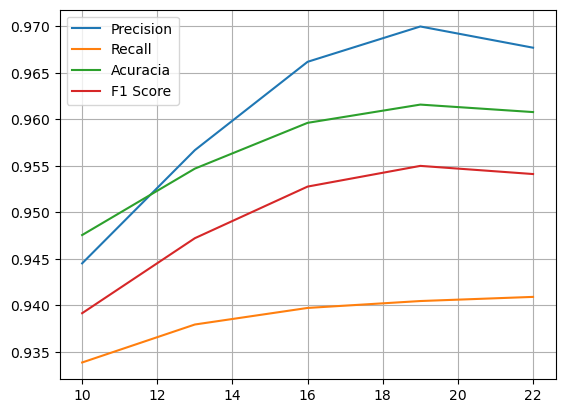

In [44]:
# Algoritmo utilizaddo para encontrar o melhor valor para features
lista = np.arange(10, 25, 3)
lista_precision = []
lista_recall = []
lista_acuracia = []
lista_f1 = []

for i in lista:
    # definition
    model = en.RandomForestClassifier(n_estimators=50, max_depth=i)
    
    # fit
    model.fit(x_train, y_train['0'])
    
    # performance 
    y_pred = model.predict(x_val)
    
    # performance
    y_val = y_val.copy()
    acuracia = mt.accuracy_score(y_val, y_pred)
    precision = mt.precision_score(y_val, y_pred)
    recall = mt.recall_score(y_val, y_pred, average='binary', pos_label=1)
    f1 = mt.f1_score(y_val, y_pred, average='binary', pos_label=1)
    
    # print(f'Acuracia: {acuracia}\n Precicion: {precision}\n Recall: {recall}\n F1_score: {f1}\n')
    lista_precision.append(precision)
    lista_recall.append(recall)
    lista_acuracia.append(acuracia)
    lista_f1.append(f1)

plt.plot(lista,lista_precision, label = 'Precision')
plt.plot(lista,lista_recall, label = 'Recall')
plt.plot(lista,lista_acuracia, label = 'Acuracia')
plt.plot(lista,lista_f1, label = 'F1 Score')
plt.legend()
plt.grid(True)